In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
import pandas as pd
import os
import seaborn as sns

In [2]:
images = []
labels = []
SIZE = 227
for directory_path in glob.glob("./dogvscats/PetImages/*"):
    label = directory_path.split("\\")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        if img is None:
            print('Wrong path:', img_path)
        else:
            img = cv2.resize(img, (SIZE, SIZE))
            img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            images.append(img)
            labels.append(label)
        
images = np.array(images)
labels = np.array(labels)

Cat
Wrong path: ./dogvscats/PetImages\Cat\140.jpg
Wrong path: ./dogvscats/PetImages\Cat\2663.jpg
Wrong path: ./dogvscats/PetImages\Cat\3300.jpg
Wrong path: ./dogvscats/PetImages\Cat\3491.jpg
Wrong path: ./dogvscats/PetImages\Cat\4833.jpg
Wrong path: ./dogvscats/PetImages\Cat\660.jpg
Wrong path: ./dogvscats/PetImages\Cat\666.jpg
Wrong path: ./dogvscats/PetImages\Cat\850.jpg
Wrong path: ./dogvscats/PetImages\Cat\936.jpg
Dog
Wrong path: ./dogvscats/PetImages\Dog\1308.jpg
Wrong path: ./dogvscats/PetImages\Dog\1866.jpg
Wrong path: ./dogvscats/PetImages\Dog\2384.jpg
Wrong path: ./dogvscats/PetImages\Dog\2688.jpg
Wrong path: ./dogvscats/PetImages\Dog\2877.jpg
Wrong path: ./dogvscats/PetImages\Dog\3136.jpg
Wrong path: ./dogvscats/PetImages\Dog\3288.jpg
Wrong path: ./dogvscats/PetImages\Dog\3588.jpg
Wrong path: ./dogvscats/PetImages\Dog\4367.jpg


In [3]:
from collections import Counter
print("Original test dataset shape {}".format(Counter(labels)))

Original test dataset shape Counter({'Cat': 4992, 'Dog': 4992})


In [4]:
from sklearn.model_selection import train_test_split
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=0)

In [5]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((7987, 227, 227, 3), (7987,), (1997, 227, 227, 3), (1997,))

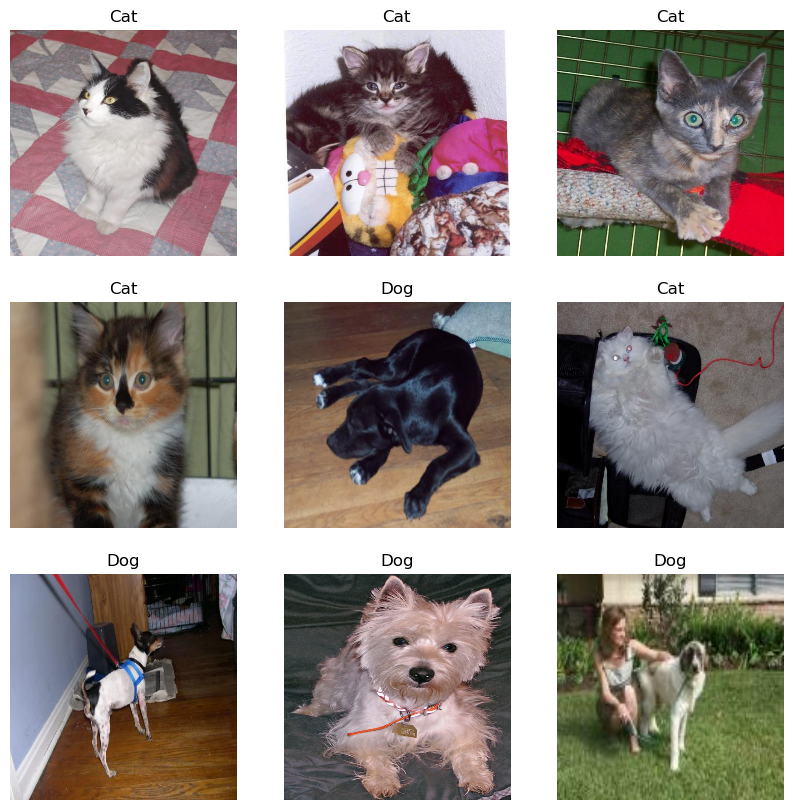

In [6]:
# Select a sample of images
sample_size = 9
sample_indexes = np.random.randint(0, len(X_train), size=sample_size)
sample_images = X_train[sample_indexes]
sample_labels = y_train[sample_indexes]

# Plot the images
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(sample_images[i*3+j], cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].set_title(sample_labels[i*3+j])
plt.show()

In [7]:
#Encode labels from text to integers.
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit(y_train)
y_train_encoded = le.transform(y_train)

le.fit(y_test)
y_test_encoded = le.transform(y_test)

In [8]:
from collections import Counter
print("Classes {}".format(Counter(y_train_encoded)))

Classes Counter({0: 3995, 1: 3992})


In [9]:
# Normalize pixel values to between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

In [10]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

In [11]:
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense

# Set the image dimensions
_,img_width, img_height, _ = X_train.shape
# Create the model
model = Sequential()
model.add(Conv2D(8, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 225, 225, 8)       224       
_________________________________________________________________
activation (Activation)      (None, 225, 225, 8)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 110, 110, 16)      1168      
_________________________________________________________________
activation_1 (Activation)    (None, 110, 110, 16)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 55, 55, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 53, 53, 32)        4

In [13]:
import tensorflow as tf

# Create a callback to monitor the validation accuracy
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)
history=model.fit(X_train,y_train_cat,epochs=10,batch_size=32,validation_split=0.2, callbacks=[early_stopping])

Epoch 1/10
200/200 [==============================] - 132s 660ms/step - loss: 0.6773 - accuracy: 0.5724 - val_loss: 0.6237 - val_accuracy: 0.6421
Epoch 2/10
200/200 [==============================] - 74s 372ms/step - loss: 0.5992 - accuracy: 0.6766 - val_loss: 0.5090 - val_accuracy: 0.7584
Epoch 3/10
200/200 [==============================] - 76s 382ms/step - loss: 0.5150 - accuracy: 0.7464 - val_loss: 0.4723 - val_accuracy: 0.7716
Epoch 4/10
200/200 [==============================] - 75s 375ms/step - loss: 0.4616 - accuracy: 0.7856 - val_loss: 0.4602 - val_accuracy: 0.7879
Epoch 5/10
200/200 [==============================] - 75s 375ms/step - loss: 0.4172 - accuracy: 0.8116 - val_loss: 0.4296 - val_accuracy: 0.8073
Epoch 6/10
200/200 [==============================] - 76s 378ms/step - loss: 0.3727 - accuracy: 0.8336 - val_loss: 0.4820 - val_accuracy: 0.7829
Epoch 7/10
200/200 [==============================] - 74s 372ms/step - loss: 0.3099 - accuracy: 0.8702 - val_loss: 0.4657 - val_a

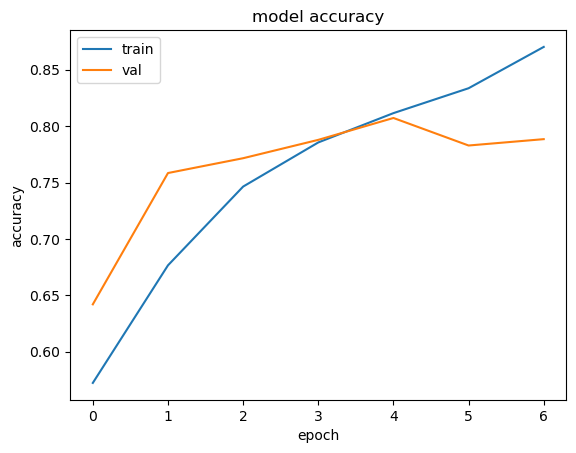

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

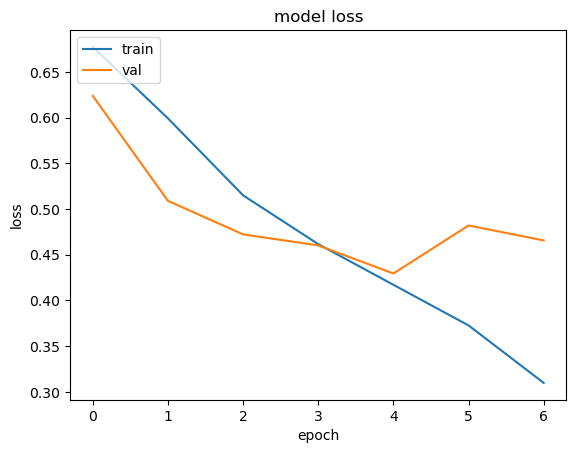

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [16]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred_inv = le.inverse_transform(y_pred)

In [17]:
from sklearn import metrics
print('Accuracy for testing data: ', metrics.accuracy_score(y_test_encoded,y_pred)*100)

Accuracy for testing data:  80.67100650976464


In [18]:
print(metrics.classification_report(y_test_encoded,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       997
           1       0.81      0.81      0.81      1000

    accuracy                           0.81      1997
   macro avg       0.81      0.81      0.81      1997
weighted avg       0.81      0.81      0.81      1997



In [19]:
Counter(y_pred)

Counter({0: 1001, 1: 996})

In [20]:
cm = metrics.confusion_matrix(y_test_encoded,y_pred)

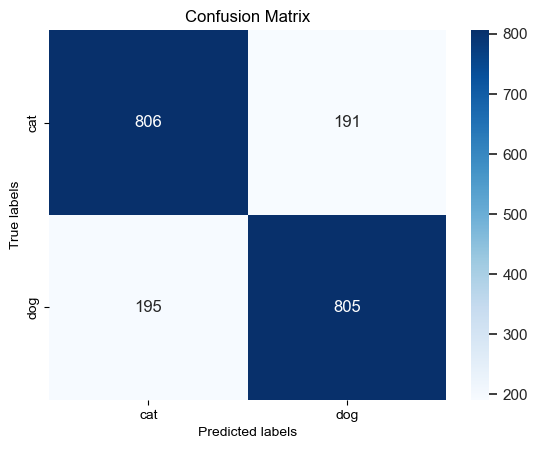

In [21]:
ax = plt.subplot()
sns.set(font_scale=1) # for label size
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['cat', 'dog']); ax.yaxis.set_ticklabels(['cat', 'dog']);
#plt.savefig('cm.png')
plt.show()